#### En este módulo se realiza la limpieza de datos y se exportan dentro de este mismo directorio "Clean datasets"

In [2]:
import pandas as pd
data_2017=pd.read_csv("../Dirt_datasets/Accidentalidad_georreferenciada_2017.csv")
data_2018=pd.read_csv("../Dirt_datasets/Accidentalidad_georreferenciada_2018.csv")
data_2019=pd.read_csv("../Dirt_datasets/Accidentalidad_georreferenciada_2019.csv")

Se verifica que hayan cargado correctamente y que contengan las mismas columnas

In [3]:
datalist=[data_2017,data_2018,data_2019]
for data in datalist:
    print(data.columns.values)
print(datalist[1].head())

['X' 'Y' 'OBJECTID' 'RADICADO' 'HORA' 'DIA_NOMBRE' 'PERIODO' 'CLASE'
 'DIRECCION' 'DIRECCION_ENC' 'CBML' 'TIPO_GEOCOD' 'GRAVEDAD' 'BARRIO'
 'COMUNA' 'DISENO' 'MES' 'DIA' 'FECHA' 'MES_NOMBRE']
['X' 'Y' 'OBJECTID' 'RADICADO' 'HORA' 'DIA_NOMBRE' 'PERIODO' 'CLASE'
 'DIRECCION' 'DIRECCION_ENC' 'CBML' 'TIPO_GEOCOD' 'GRAVEDAD' 'BARRIO'
 'COMUNA' 'DISENO' 'MES' 'DIA' 'FECHA' 'MES_NOMBRE' 'X_MAGNAMED'
 'Y_MAGNAMED' 'LONGITUD' 'LATITUD']
['X' 'Y' 'OBJECTID' 'RADICADO' 'HORA' 'DIA_NOMBRE' 'PERIODO' 'CLASE'
 'DIRECCION' 'DIRECCION_ENC' 'CBML' 'TIPO_GEOCOD' 'GRAVEDAD' 'BARRIO'
 'COMUNA' 'DISENO' 'MES' 'DIA' 'FECHA' 'MES_NOMBRE']
           X         Y  OBJECTID   RADICADO      HORA DIA_NOMBRE  PERIODO  \
0 -75.584608  6.261152    550556  1612819.0  01:30 PM  DOMINGO       2018   
1 -75.582266  6.293102    550557  1612866.0  01:30 PM  DOMINGO       2018   
2 -75.560337  6.252080    550558  1612809.0  02:30 PM  DOMINGO       2018   
3 -75.597828  6.222382    550559  1612812.0  02:30 PM  DOMINGO      

#### El dataset correspondiente al 2018 presenta dos diferencias respecto a los demás
- Las columnas "X_MAGNAMED" y "Y_MAGNAMED" no se encuentran en los otros dos años y deben ser eliminadas.
- Las columnas "LONGITUD" y "LATITUD" tampoco se encuentras en los otros dos años, pero sus valores coinciden con la
columnas de "X" e "Y", por lo tanto también se eliminan

In [4]:
datalist[1]=datalist[1].drop(['X_MAGNAMED','Y_MAGNAMED',"LATITUD","LONGITUD"],axis=1)
print(datalist[1].columns.values)



['X' 'Y' 'OBJECTID' 'RADICADO' 'HORA' 'DIA_NOMBRE' 'PERIODO' 'CLASE'
 'DIRECCION' 'DIRECCION_ENC' 'CBML' 'TIPO_GEOCOD' 'GRAVEDAD' 'BARRIO'
 'COMUNA' 'DISENO' 'MES' 'DIA' 'FECHA' 'MES_NOMBRE']


In [5]:
if (datalist[0].columns==datalist[1].columns).all and (datalist[0].columns==datalist[2].columns).all:
    print("Los datasets poseen columnas iguales")
else:print("Los datasets poseen columnas diferentes")


Los datasets poseen columnas iguales


En esta limpieza también se realiza un primer filtro de características
- "X" e "Y" corresponden a la latitud y longitud de el accidente, dificilmente un accidente pueda ocurrir
en las mismas coordenadas, no se considera util.
- "OBJECTID" Es la clave primaria dentro de una base de datos mongo por lo que no es una carecterística
- "RADICADO" Es un valor único con el que se radicó cada accidente por lo tanto no es relevante
- "FECHA" los datasets ya cuentan con una fecha desglosada en mes y día.
- "MES_NOMBRE" no todas las filas tienen completo este campo, además de que ya se cuenta con una columna "MES" con
el número del mes.
- "DIRECCION_ENC" es otro formato para la dirección, por lo que se puede descartar.

In [6]:
for i in range(3):
    datalist[i]=datalist[i].drop(['X','Y','OBJECTID', 'RADICADO','FECHA','MES_NOMBRE','DIRECCION_ENC','CBML'],axis=1)

# print(datalist[0].columns)
# a=datalist[0]
# print(a['BARRIO'].unique())# for column in datalist[0].columns:
#     print(column)
#     print(datalist[0][column].unique())


Lo siguiente es verificar la presencia de datos atípicos o mal escritos en las clases
y sean reemplazados manualmente en un archivo csv.


In [7]:
dataTotal=pd.concat(datalist,axis=0)
# print(dataTotal.columns)
dia_nombre=dataTotal['DIA_NOMBRE'].unique()
clase=dataTotal['CLASE'].unique()
tipo_geocod=dataTotal['TIPO_GEOCOD'].unique()
gravedad=dataTotal['GRAVEDAD'].unique()
barrio=dataTotal['BARRIO'].unique()
comuna=dataTotal['COMUNA'].unique()
mes=dataTotal['MES'].unique()
dia=dataTotal['DIA'].unique()
diseno=dataTotal['DISENO'].unique()
print(barrio)

['Santa Mónica' 'Pedregal' 'Carlos E. Restrepo' 'Guayabal' 'La América'
 'San Pablo' 'El Progreso' 'Cabecera San Antonio de Prado' 'Campo Amor'
 'El Poblado' 'Manila' 'La Candelaria'
 'Área de Expansión Altos de Calasanz' 'Cuarta Brigada'
 'Los Conquistadores' 'Tenche' 'Patio Bonito' 'La Florida'
 'Universidad Nacional' 'El Estadio' 'Diego Echavarría' 'Villatina'
 'Jardín Botánico' 'Santa Fé' 'Doce de Octubre No.1' 'La Mansión' 'Boston'
 'Ferrini' 'La Gloria' 'Villa Carlota' 'Kennedy' 'Miranda' 'Alejandría'
 'Héctor Abad Gómez' 'La Alpujarra' 'El Castillo' 'Cerro Nutibara'
 'Berlin' 'López de Mesa' 'Santa Inés' 'Olaya Herrera' 'Perpetuo Socorro'
 'El Pomar' 'Corazón de Jesús' 'Florida Nueva' 'Los Balsos No.2'
 'Suramericana' 'Moravia' 'Moscú No. 2' 'Caribe' 'Los Colores'
 'Bolivariana' 'San Javier No.1' 'Estación Villa' 'U.D. Atanasio Girardot'
 'El Velódromo' 'Llanaditas' 'Cristo Rey' 'Las Acacias'
 'Nueva Villa de Aburrá' 'El Raizal' 'Calasanz' 'Las Palmas' 'Belalcázar'
 'San Diego' 

In [7]:
dataTotal.to_csv('dataTotal.csv')


['1209' '0604' '1101' '1510' '1204' '0107' '0519' '8000' '1507' '1418'
 '1419' '1019' '6097' '1115' '1105' '1502' '1421' '1417' '0701' '1113'
 '1607' '0813' '0416' '1504' '0602' '0802' '1016' '1201' '1612' '1403'
 '0607' '0415' '1416' '0507' '1009' '1414' '1621' '0401' '0710' '0304'
 '0722' '1012' '0306' '1008' '1117' '1415' '1102' '0405' '0105' '0517'
 '1114' '1107' '1309' '1005' '1116' '1112' '0806' '1509' '1109' '1618'
 '0305' '1202' '1014' '0508' '1020' '0303' '1006' '0906' '1011' '1111'
 '0510' '0915' '1103' '0406' '1605' '1013' '0725' '1304' '0511' '0409'
 '1004' '6098' '1017' '0501' '1602' '1412' '0717' '0516' '1007' '0913'
 '6000' '0513' '0308' '0104' '1001' '0103' '1210' '0402' '1401' '0502'
 '1404' '1206' '1411' '0905' '0608' '1301' '0514' '0307' '1620' '1503'
 '1018' '1208' '1420' '0715' '0706' '0907' '0810' '0204' '0407' '1410'
 '1603' '0509' '1310' '0605' '1616' '1608' '0101' '1207' '0106' '9083'
 '0504' '0716' '0603' '6087' '1422' '7001' '1108' '0914' '1409' '0705'
 '1407

La limpieza manual se hizo con la ayuda de una lista de valores únicos en cada columna donde se verificó
uno por uno que estuviera bien escrito y si existían valores que se estuvieran refiriendo a lo mismo como era el
caso de la columna "BARRIO" donde hallámos valores "San Antonio de parado" y "Corregimiento san antonio de prado"
que se referían al mismo pero que al codificarse posteriormente son interpretados conmo distintos.

Una vez que se hizo una limpieza manual de datos de clases mal escritos, cargamos nuevamente el dataset


In [9]:
dataTotal2=pd.read_csv("dataTotalv2.csv")

Durante la limpieza manual de se omitieron valores atípicos encontrados para las columnas de "BARRIO" y "COMUNA"
donde habían valores como: 'Sin Nombre','0','Inst','AUC1' entre otros para buscar cuántas filas los contenian
y tomar decisiones sobre que hacer con ellos.
Estos datos atípicos tuvieron pocas apareiciones 2 o 3 por cada uno, por lo que se tomó la decisión de eliminar
la fila que los contenía.


In [10]:
column=['BARRIO','COMUNA']
atypical=[['Sin Nombre','0','Inst','AUC1','6001','9086','7001','9004'],['AU','Sin Inf']]
a=zip(column,atypical)

#borra los datos atípicos de la segunda versión del dataset
for i ,j in a:
    for k in j:
        dataTotal2 = dataTotal2.drop(dataTotal2[dataTotal2[i] ==k].index)

736


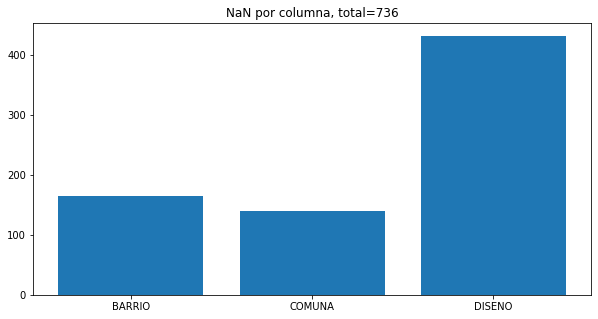

In [34]:
import matplotlib.pyplot as plt
nan_columns = []
nan_values = []

for column in dataTotal2.columns:
    b=dataTotal2[column].isnull().sum();
    if b>0:
        nan_columns.append(column)
        nan_values.append(b)

fig, ax = plt.subplots(figsize=(10,5))
plt.title('NaN por columna, total='+ str(dataTotal2.isnull().sum().sum()))
plt.bar(nan_columns, nan_values)

print(dataTotal2.isnull().sum().sum())

En el gráfico anterior se aprecian los valores nulos (NaN) por cada columna que los contiene
para un total de 736 que si bien es un número pequeño comparado con el total de datos de 113.659
se optó por rellenarlos en lugar de elimarlos, la estratégia a usar para esto fue la de 'most_frequent' que
por su traducción al español completa con el valor más frecuente en cada columna.

In [29]:
#datos nulos
from sklearn.impute import SimpleImputer
print(dataTotal2.isnull().sum())
strategy = SimpleImputer(strategy='most_frequent')
dataTotalF=strategy.fit_transform(dataTotal2)
print(dataTotalF)

DIA_NOMBRE       0
PERIODO          0
CLASE            0
DIRECCION        0
TIPO_GEOCOD      0
GRAVEDAD         0
BARRIO         165
COMUNA         140
DISENO         431
MES              0
DIA              0
dtype: int64
[['DOMINGO' 2017 'Choque' ... 'Lote o Predio' 7 2]
 ['MIÉRCOLES' 2017 'Choque' ... 'Interseccion' 5 10]
 ['DOMINGO' 2017 'Choque' ... 'Tramo de via' 5 7]
 ...
 ['VIERNES' 2019 'Otro' ... 'Tramo de via' 8 23]
 ['VIERNES' 2019 'Choque' ... 'Tramo de via' 7 19]
 ['LUNES' 2019 'Choque' ... 'Tramo de via' 7 29]]


In [32]:
newDf = pd.DataFrame(data=dataTotalF, columns=dataTotal2.columns)
print(newDf.isnull().sum())

DIA_NOMBRE     0
PERIODO        0
CLASE          0
DIRECCION      0
TIPO_GEOCOD    0
GRAVEDAD       0
BARRIO         0
COMUNA         0
DISENO         0
MES            0
DIA            0
dtype: int64


# El dataset se encuentra sin datos atípicos o extraños.

In [34]:
newDf.to_csv('cleanData.csv',index=False)

